In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
# Estilo com seaborn
sns.set(style="whitegrid")

# Função para gerar gráfico de sentimento
def gerar_grafico_sentimento(arquivo_csv, titulo):
    df = pd.read_csv(arquivo_csv)

    # Contagem dos sentimentos
    contagem = df['sentimento'].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(6, 4))
    cores = {'positivo': 'green', 'negativo': 'red', 'neutro': 'gray'}
    contagem.plot(kind='bar', color=[cores.get(x, 'blue') for x in contagem.index])

    plt.title(f'Sentimentos - {titulo}')
    plt.xlabel('Sentimento')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

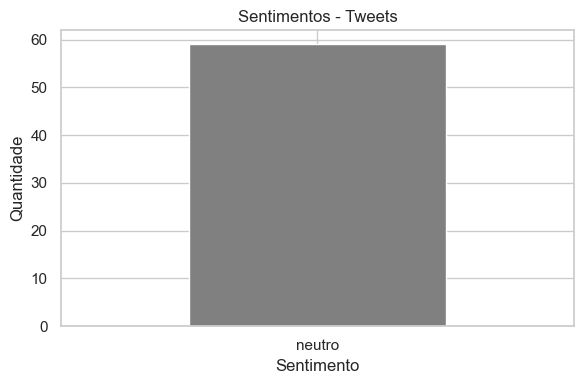

In [ ]:
gerar_grafico_sentimento('tweets_bets_com_sentimento.csv', 'Tweets')


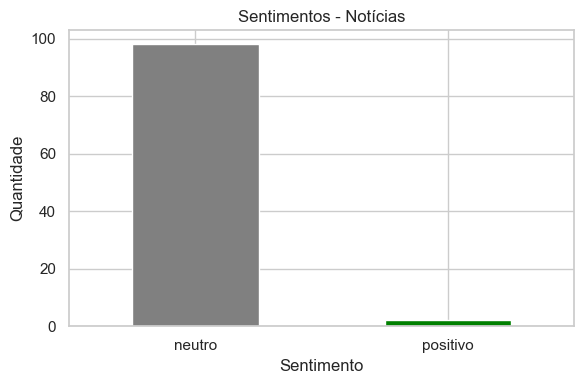

In [ ]:
gerar_grafico_sentimento('noticias_bets_com_sentimento.csv', 'Notícias')


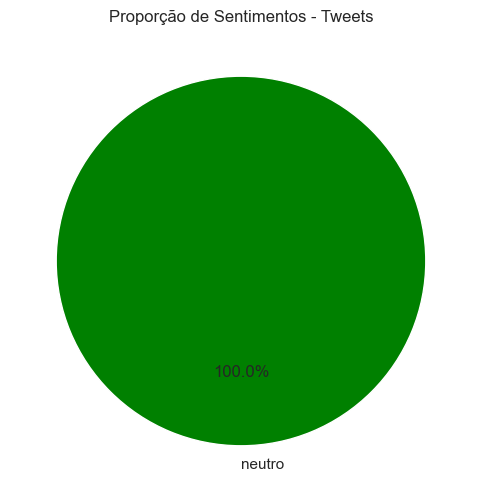

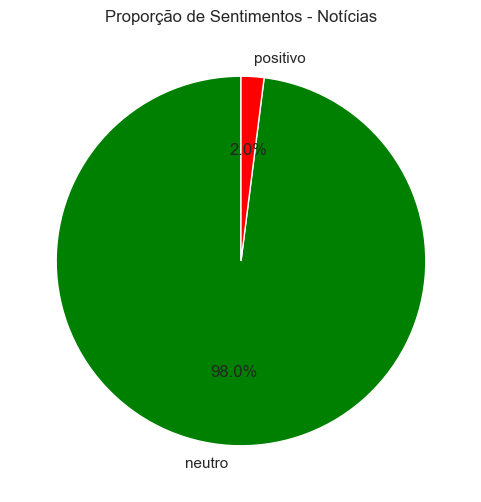

In [29]:
def grafico_pizza_sentimento(arquivo_csv, titulo):
    df = pd.read_csv(arquivo_csv)
    contagem = df['sentimento'].value_counts()
    
    plt.figure(figsize=(6,6))
    cores = ['green', 'red', 'gray']
    contagem.plot.pie(colors=cores, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporção de Sentimentos - {titulo}')
    plt.ylabel('')
    plt.show()

grafico_pizza_sentimento('tweets_bets_com_sentimento.csv', 'Tweets')
grafico_pizza_sentimento('noticias_bets_com_sentimento.csv', 'Notícias')


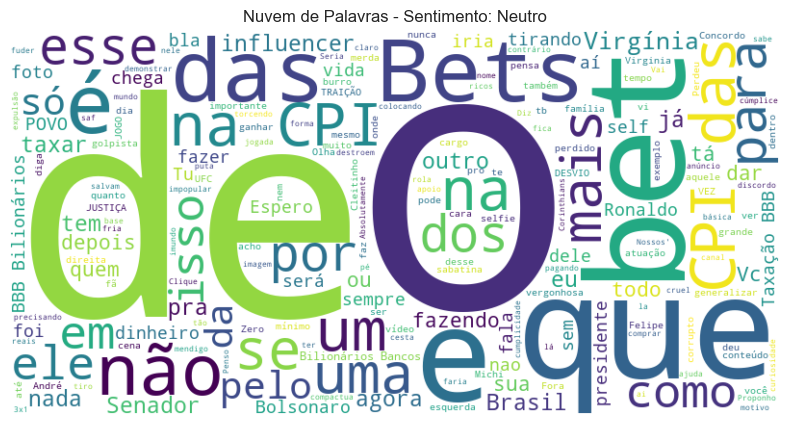

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud_sentimento(arquivo_csv, sentimento_filtro):
    df = pd.read_csv(arquivo_csv)
    
    # Padroniza os sentimentos para evitar erro com espaços e maiúsculas
    df['sentimento'] = df['sentimento'].str.strip().str.lower()
    
    # Filtra textos pelo sentimento desejado
    textos = df[df['sentimento'] == sentimento_filtro.lower()]['Descrição'].dropna().str.cat(sep=' ')
    
    if not textos.strip():
        print(f"Nenhum texto encontrado para o sentimento '{sentimento_filtro}' 😕")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textos)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - Sentimento: {sentimento_filtro.capitalize()}')
    plt.show()

wordcloud_sentimento('tweets_bets_com_sentimento.csv', 'neutro')


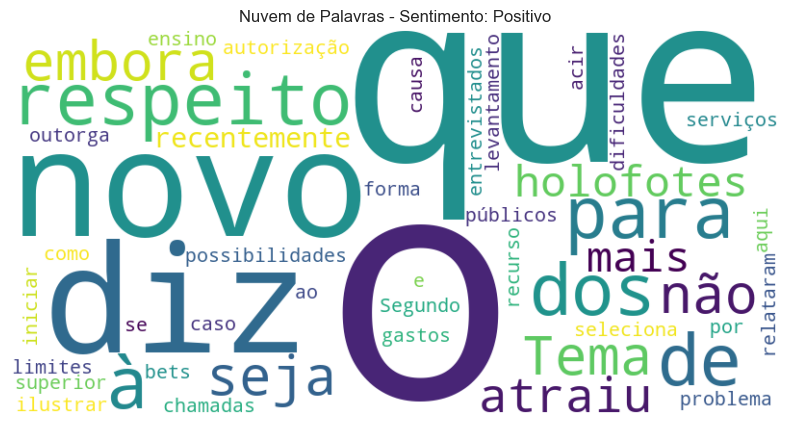

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def wordcloud_sentimento(arquivo_csv, sentimento_filtro):
    df = pd.read_csv(arquivo_csv)
    
    # Padroniza os sentimentos
    df['sentimento'] = df['sentimento'].str.strip().str.lower()
    
    # Filtra textos pelo sentimento desejado
    textos = df[df['sentimento'] == sentimento_filtro.lower()]['Descrição'].dropna().str.cat(sep=' ')
    
    if not textos.strip():
        print(f"Nenhum texto encontrado para o sentimento '{sentimento_filtro}' 😕")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textos)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - Sentimento: {sentimento_filtro.capitalize()}')
    plt.show()

wordcloud_sentimento('noticias_bets_com_sentimento.csv', 'positivo')
